<a href="https://colab.research.google.com/github/adibhosn/Machine_learning_lab/blob/main/Naive_Bayes_Implementing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Naive Bayes**
Naive Bayes is a simple yet powerful probabilistic algorithm used for classification tasks. It’s based on **Bayes' Theorem** and works under the assumption that all features are independent of each other (which is why it’s called "naive").

### How it works:
1. It calculates the probability of a class \( y \) given the input features \( X \) using Bayes' Theorem:
   \[
   P(y|X) = \frac{P(X|y) \cdot P(y)}{P(X)}
   \]
2. Because of the "naive" assumption, it simplifies the calculation by treating each feature as independent:
   \[
   P(X|y) = P(x_1|y) \cdot P(x_2|y) \cdot ... \cdot P(x_n|y)
   \]
3. Finally, it predicts the class with the highest probability.

### When to use it:
Naive Bayes is great for text-based tasks like **spam detection**, **sentiment analysis**, or **document classification**. It’s fast, efficient, and works well with high-dimensional data.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Curso_estatística_Python/census.csv')
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Statistical Analysis of Data

In [ ]:
df.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
final-weight,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
np.unique(df['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

# Visualization

<Axes: xlabel='income', ylabel='count'>

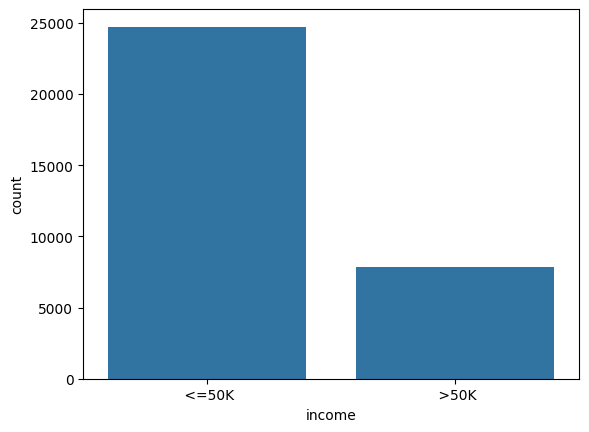

In [ ]:
sns.countplot(x = df['income'])

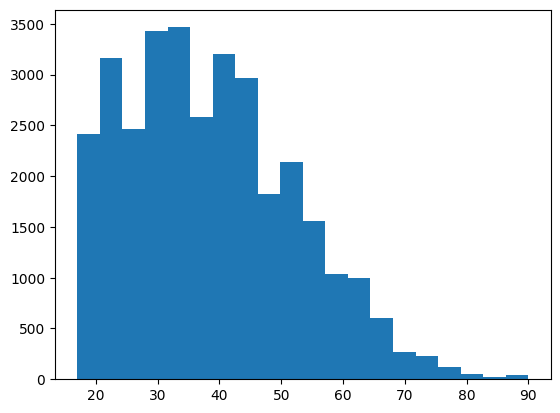

In [ ]:
plt.hist(x = df['age'], bins = 20);

In [ ]:
treemap = px.treemap(df, path=['workclass', 'income'])
treemap.show()

#this graph shows the relation between this two features

In [ ]:
df.columns.get_loc('income')

14

# Separating in X(all the df but the target feature) and Y(target feature)

In [ ]:
X_census = df.drop(columns='income')
Y_census = df['income']

In [ ]:
Y_census

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
32556,<=50K
32557,>50K
32558,<=50K
32559,<=50K


In [ ]:
X_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


# Normalization, standardization and reducing data to the same scale

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer


encoder = LabelEncoder()
X_census['workclass'] = encoder.fit_transform(X_census['workclass'])
X_census['education'] = encoder.fit_transform(X_census['education'])
X_census['marital-status'] = encoder.fit_transform(X_census['marital-status'])
X_census['occupation'] = encoder.fit_transform(X_census['occupation'])
X_census['relationship'] = encoder.fit_transform(X_census['relationship'])
X_census['race'] = encoder.fit_transform(X_census['race'])
X_census['sex'] = encoder.fit_transform(X_census['sex'])
X_census['native-country'] = encoder.fit_transform(X_census['native-country'])

In [ ]:
hot_encoding_list = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [ ]:
X_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5


In [ ]:
hot_encoder = OneHotEncoder()

X_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), hot_encoding_list)], remainder='passthrough').fit_transform(X_census).toarray()





In [ ]:
Y_census = Y_census.map(lambda x: 1 if x.strip() == '>50K' else 0)
Y_census.shape

(32561,)

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_census, Y_census, test_size=0.2, random_state=42, stratify=Y_census)

In [ ]:
X_train.shape, Y_train.shape

((26048, 108), (26048,))

In [ ]:
X_test.shape, Y_test.shape

((6513, 108), (6513,))

# saving the normalized data, so that it can be used in other algorithms

In [ ]:
import pickle

with open('census_x_train.pkl', 'wb') as f:
  pickle.dump([X_train, X_test, Y_train, Y_test], f)

# After studying Naive Bayes theoretically, here comes its implementation using the scikit-learn library.

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_census = GaussianNB()
naive_census.fit(X_train, Y_train)

prevision = naive_census.predict(X_test)
prevision


array([0, 0, 1, ..., 0, 0, 0])

# Bad accuracy, probably due to some unnecessary data processing, but my goal in this notebook is just to implement the algorithm.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
accuracy_score(Y_test, prevision)

0.799324428066943

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

confusion_matrix(Y_test, prevision)

array([[4708,  237],
       [1070,  498]])

In [ ]:
print(classification_report(Y_test, prevision))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      4945
           1       0.68      0.32      0.43      1568

    accuracy                           0.80      6513
   macro avg       0.75      0.63      0.66      6513
weighted avg       0.78      0.80      0.77      6513



## Testing with a small df, just to fix some concepts

In [ ]:
df_bc = pd.read_csv('/content/drive/MyDrive/Curso_estatística_Python/risco_credito.csv')
df_bc

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [ ]:
X_risco_credito = df_bc.drop(columns='risco')
Y_risco_credito = df_bc['risco']

In [ ]:
for col in X_risco_credito.columns:
  le = LabelEncoder()
  X_risco_credito[col] = le.fit_transform(X_risco_credito[col])

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, Y_risco_credito)

GaussianNB()

In [ ]:
previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsao


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



array(['baixo', 'moderado'], dtype='<U8')